In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df =pd.read_csv("C:/Users/mahis/Desktop/Diwali Sales Data.csv",encoding='unicode_escape')
df.shape

(11251, 15)

In [5]:
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [17]:
df['Amount']=df['Amount'].astype('int')

In [19]:
df['Amount'].dtypes

dtype('int32')

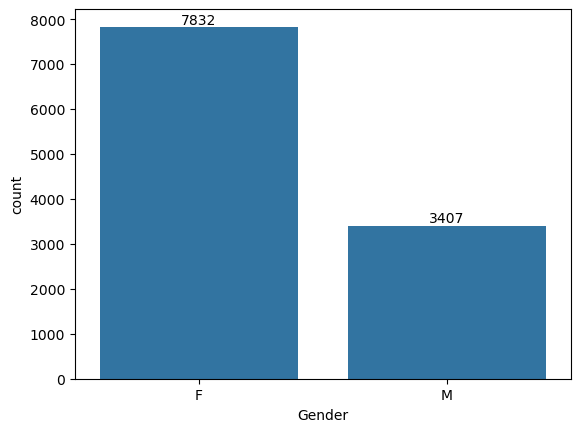

In [21]:
#Gender
a = sns.countplot(x='Gender',data=df)
for bars in a.containers:
    a.bar_label(bars)

In [23]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_gen)

  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

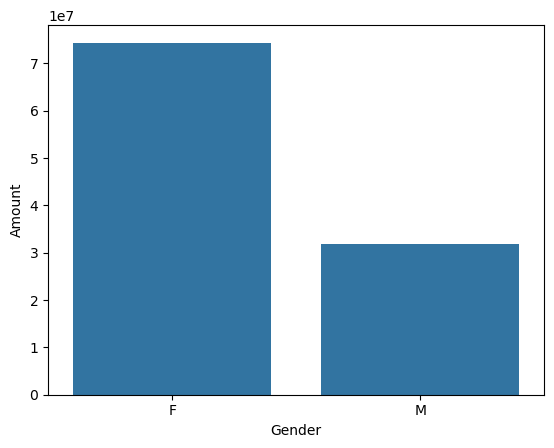

In [25]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data = sales_gen) 

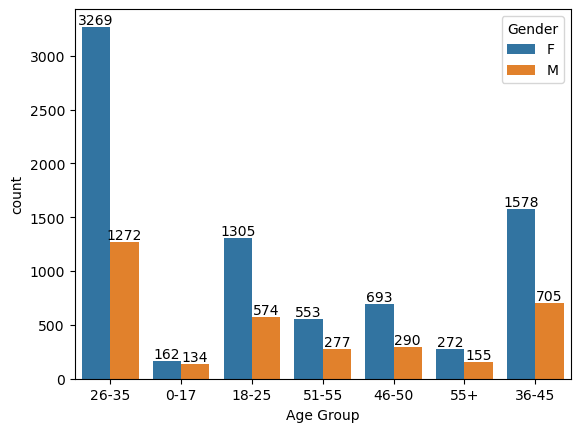

In [27]:
#age
a=sns.countplot(data =df,x='Age Group', hue='Gender')

for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

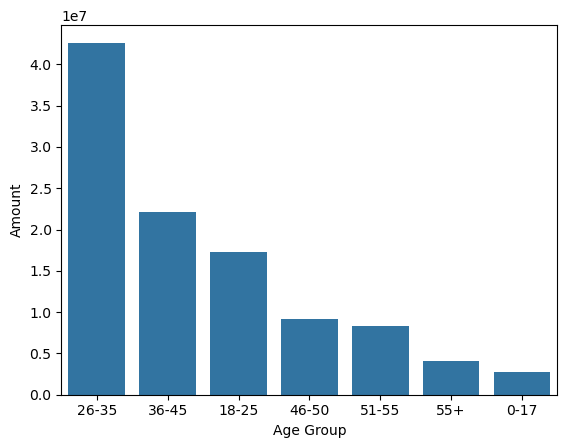

In [29]:
sales_age =df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

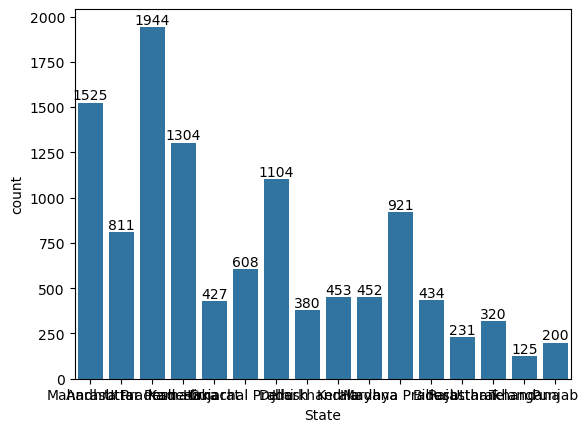

In [31]:
#state
a=sns.countplot(data =df,x='State')

for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

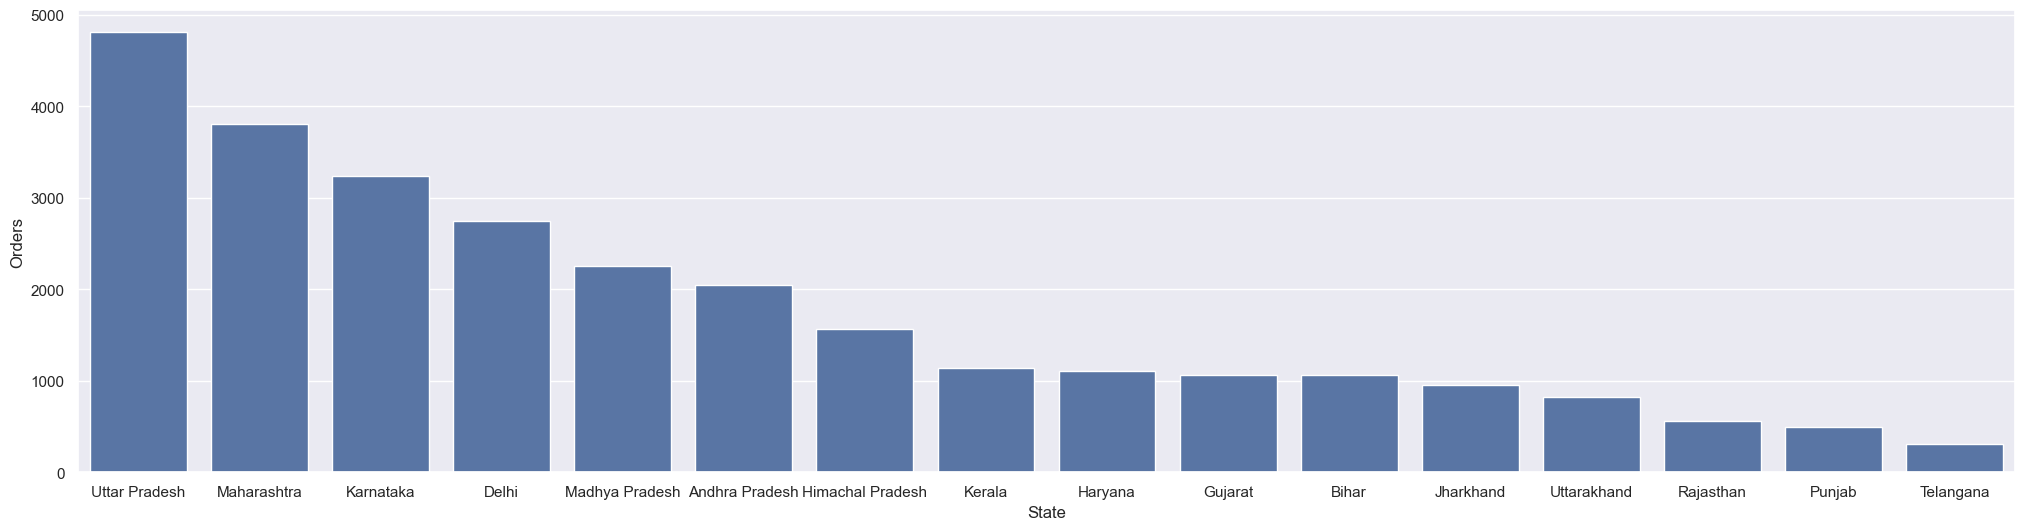

In [35]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

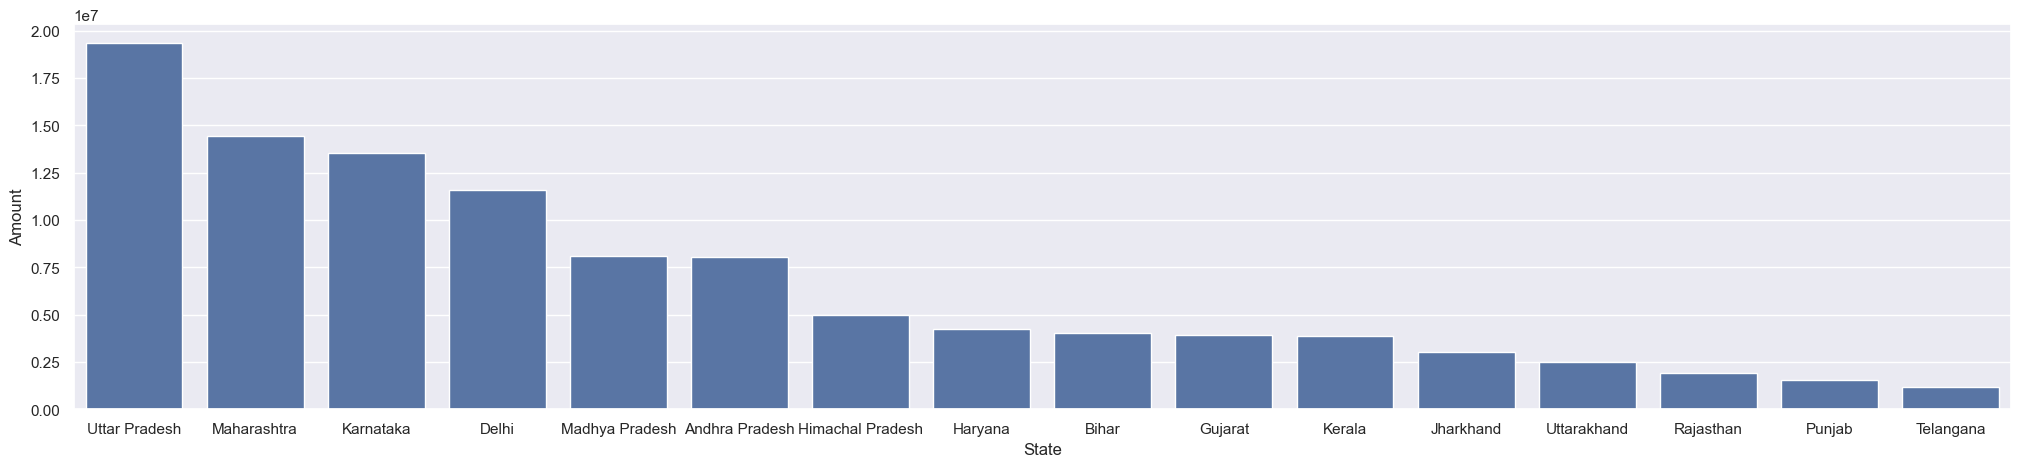

In [39]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(20)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

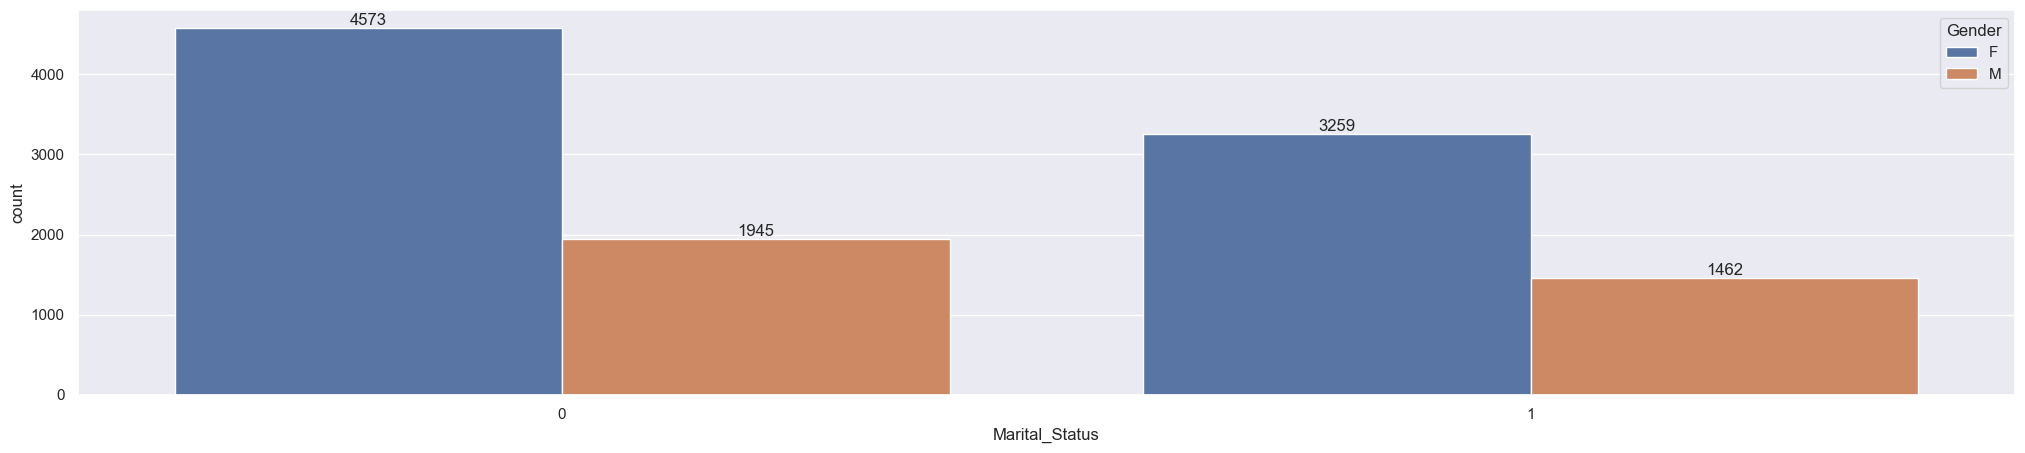

In [41]:
#Marital Status

a=sns.countplot(data =df,x='Marital_Status', hue='Gender')

for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

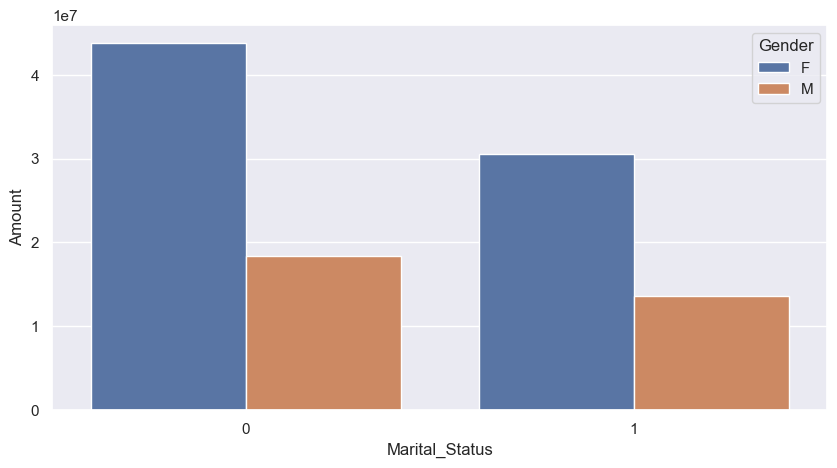

In [43]:
sales_mar =df.groupby(['Marital_Status','Gender'],as_index=False).sum().sort_values(by ='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_mar)

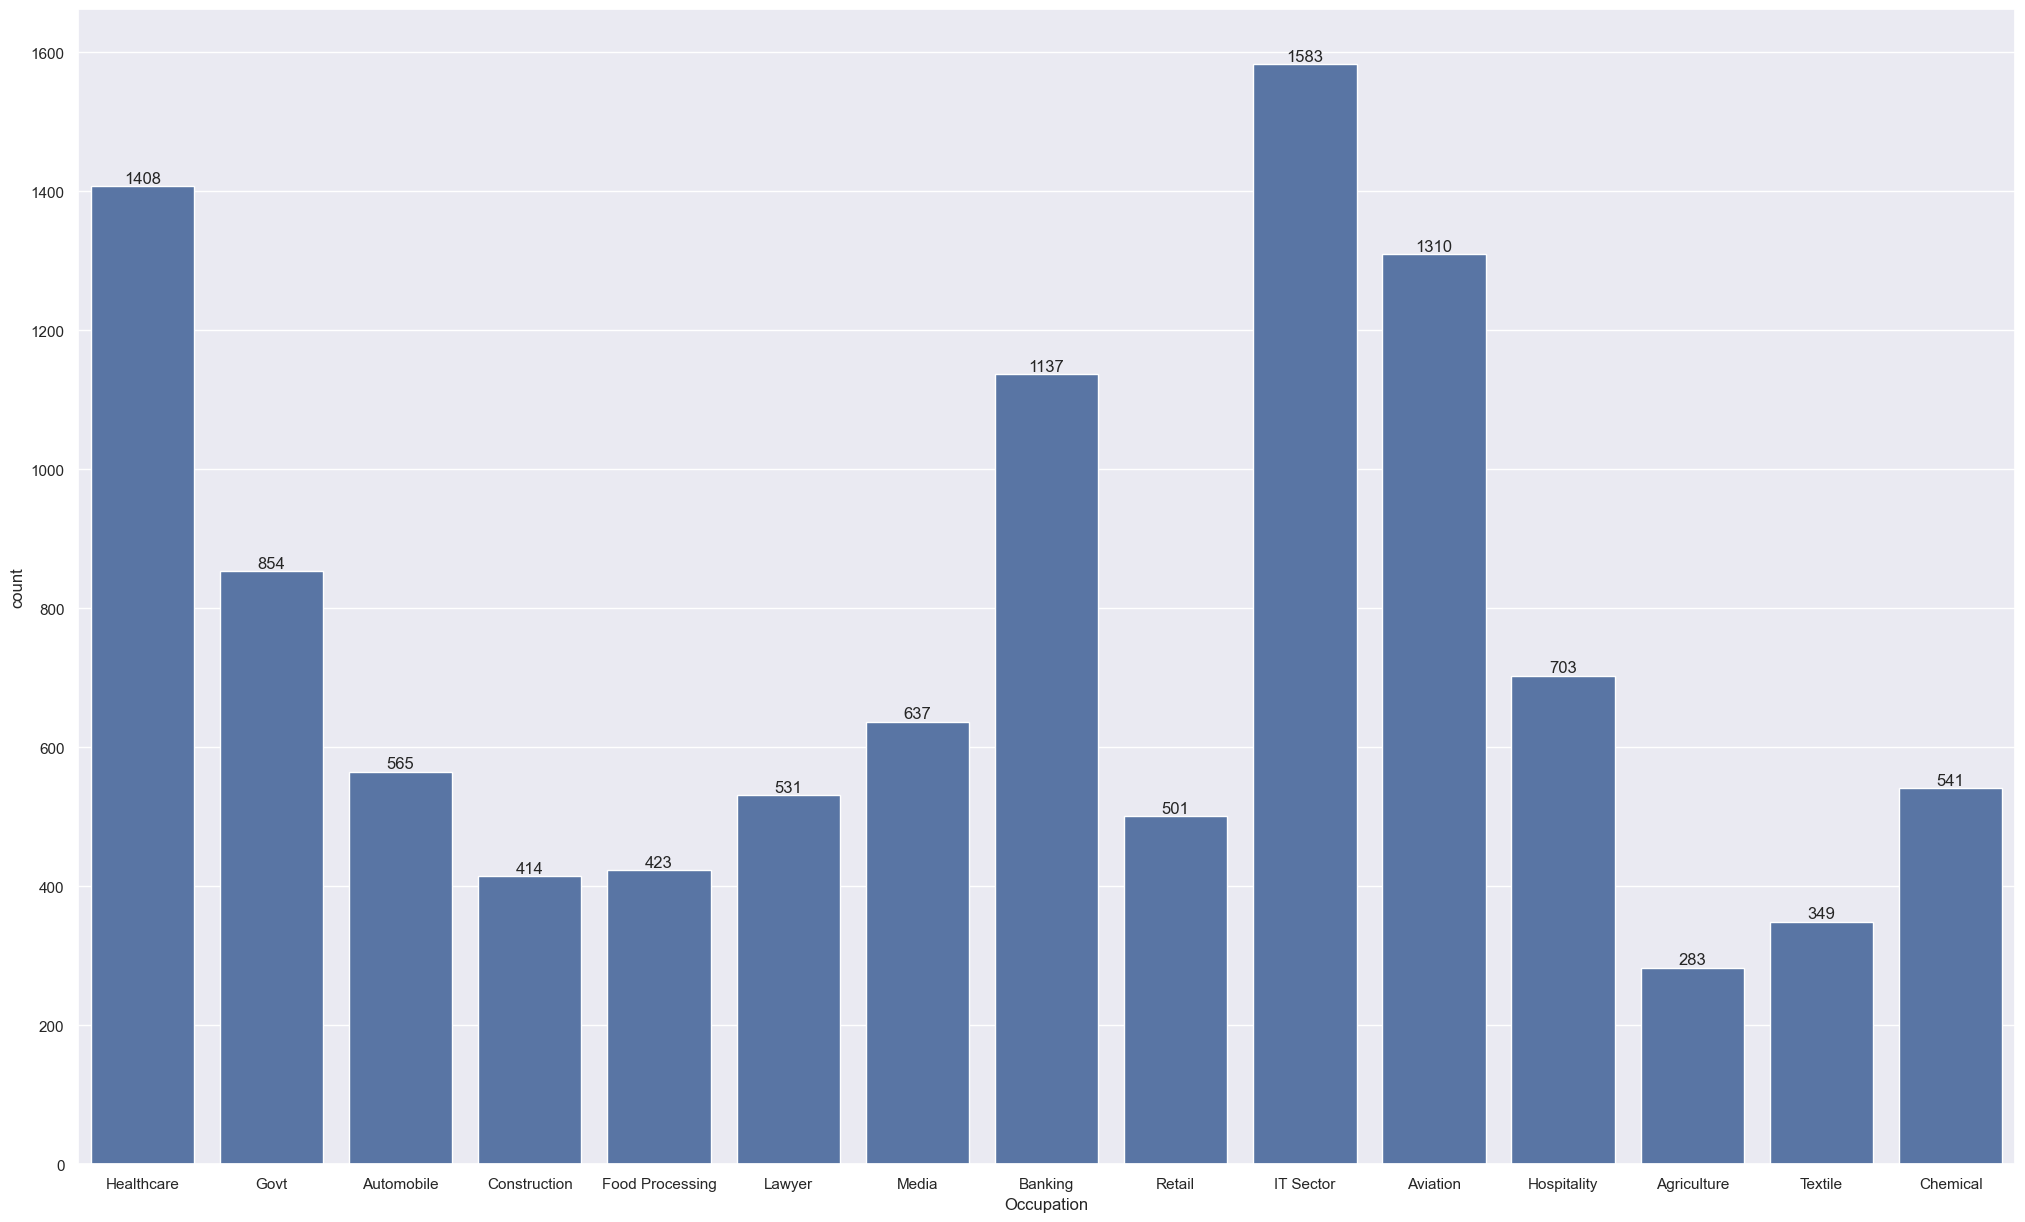

In [45]:
#Occupation
sns.set(rc={'figure.figsize':(25,15)})

a=sns.countplot(data =df,x='Occupation')

for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

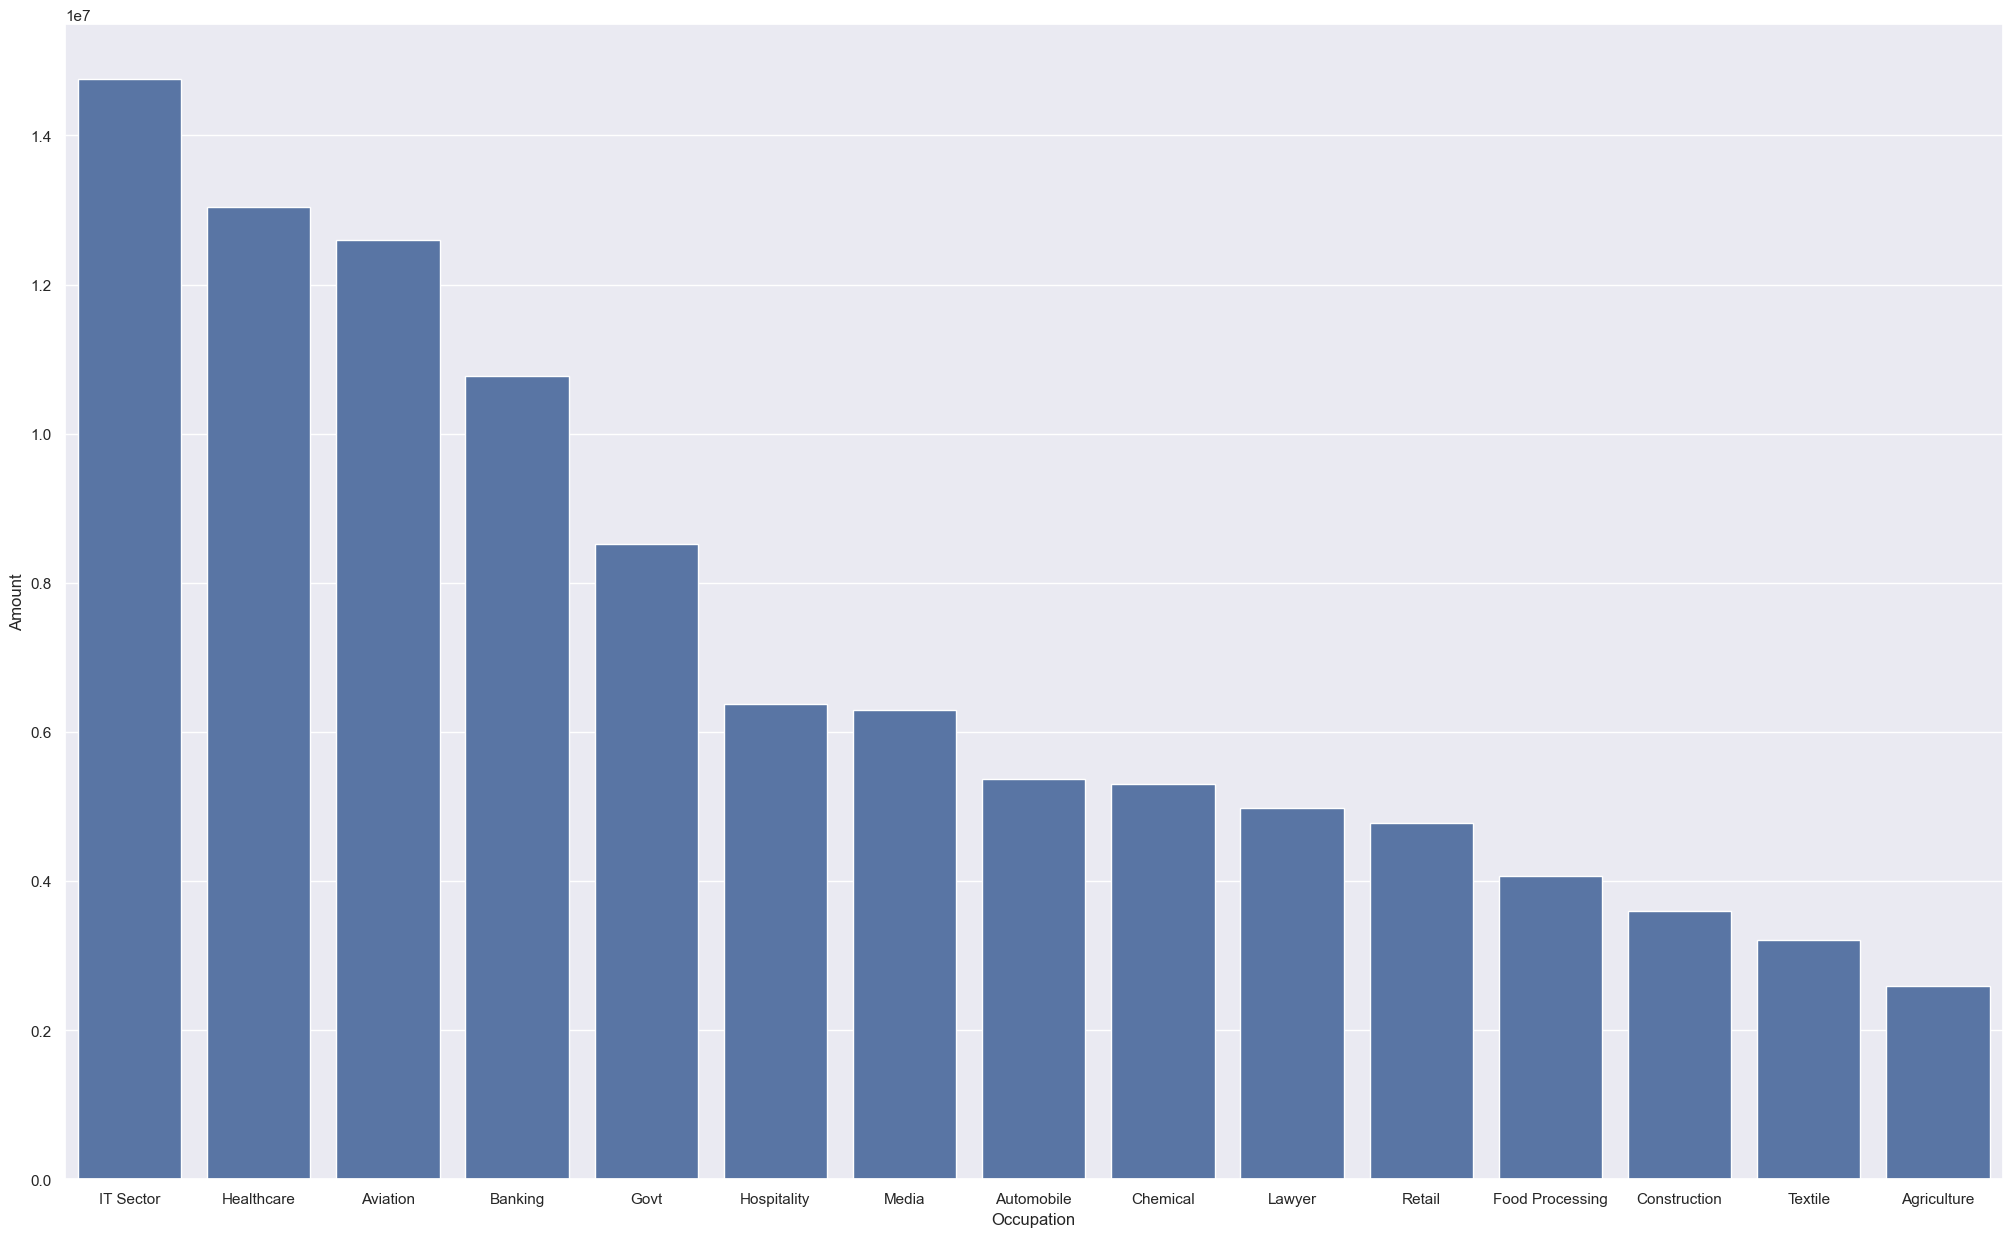

In [47]:
sales_occ = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_occ,x='Occupation',y='Amount')

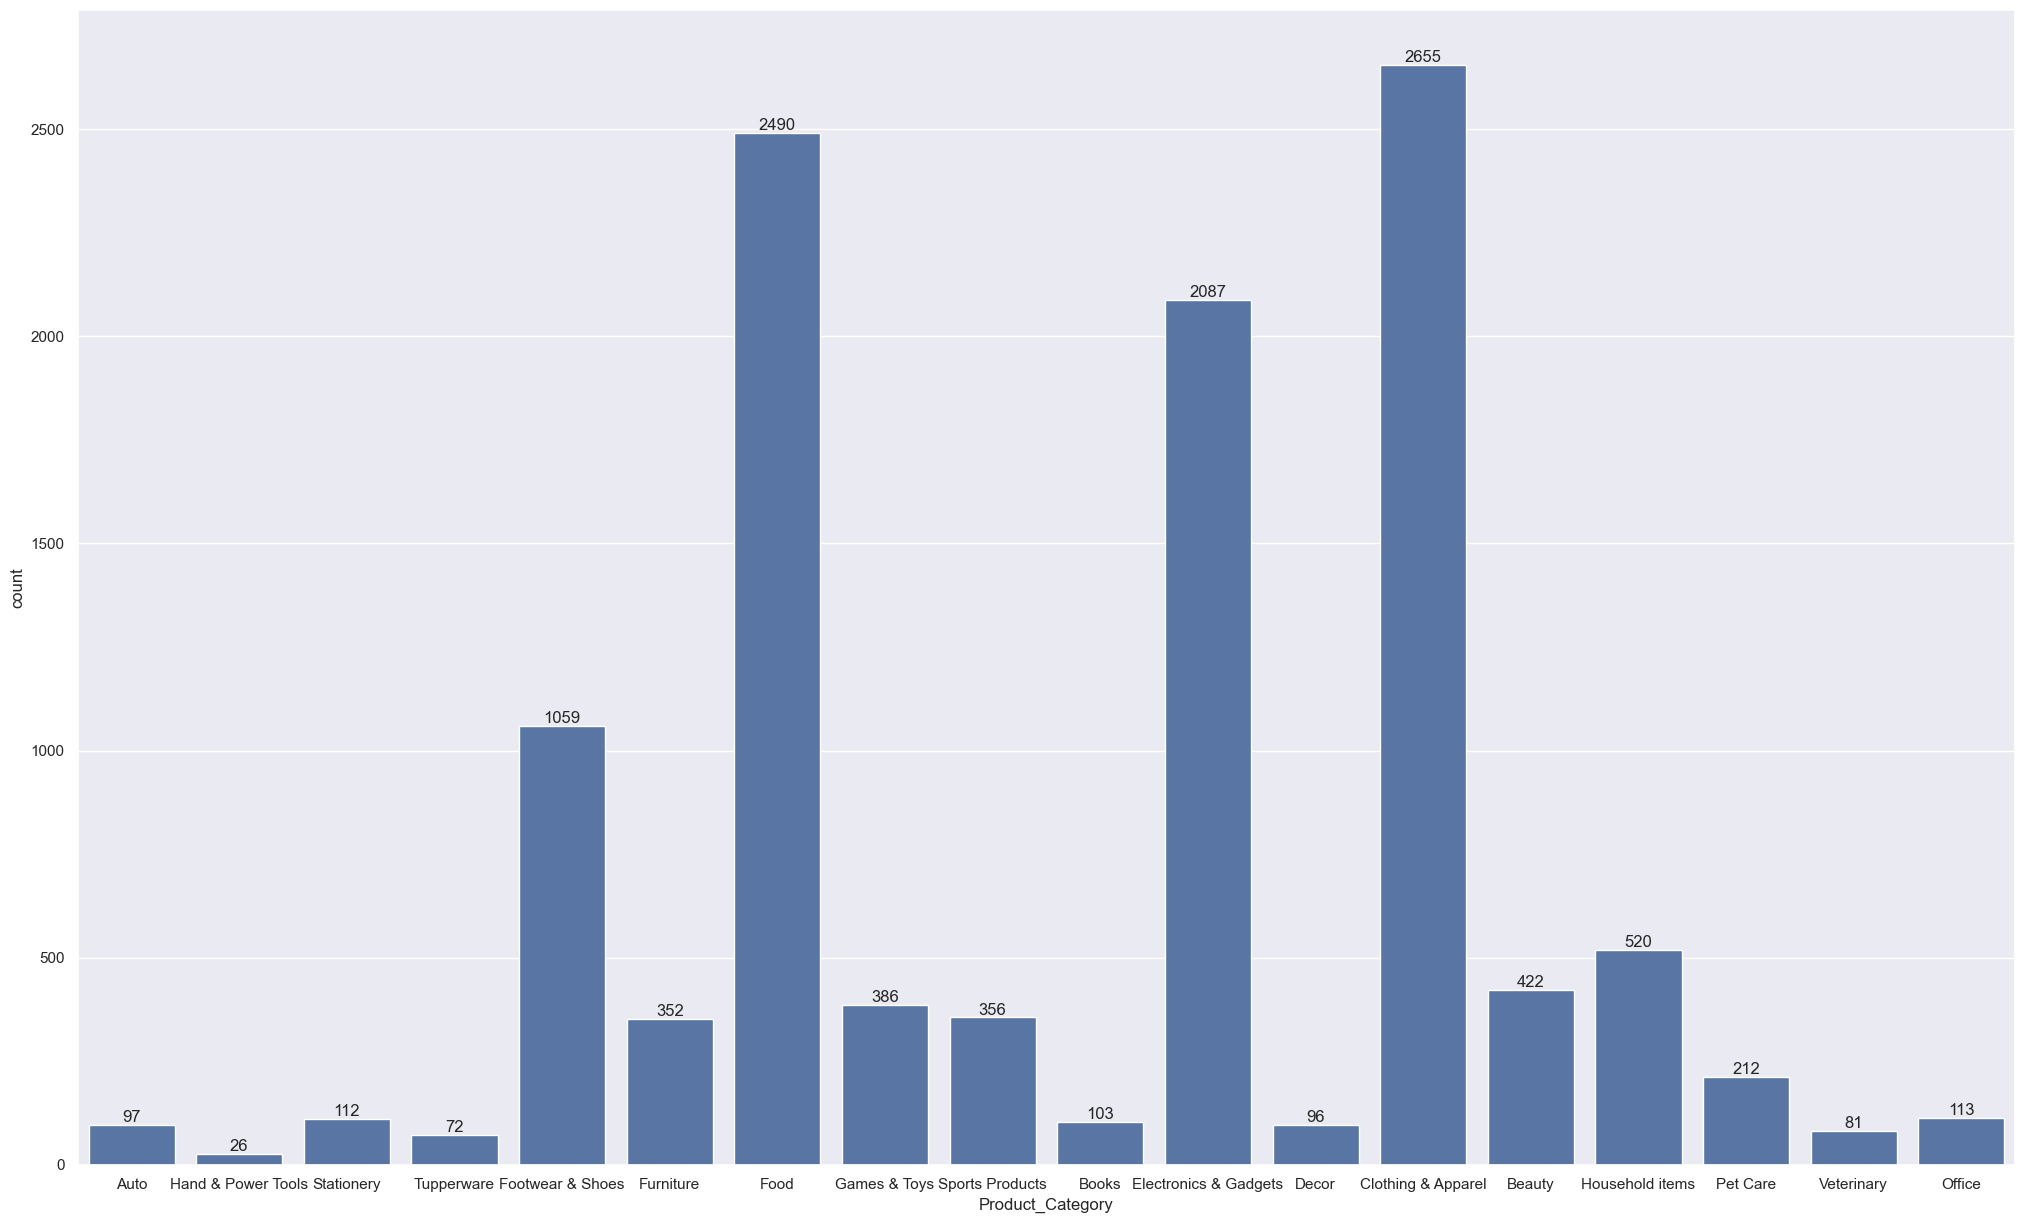

In [49]:
#Product_Category
a=sns.countplot(data=df,x='Product_Category')
for bars in a.containers:
    a.bar_label(bars)

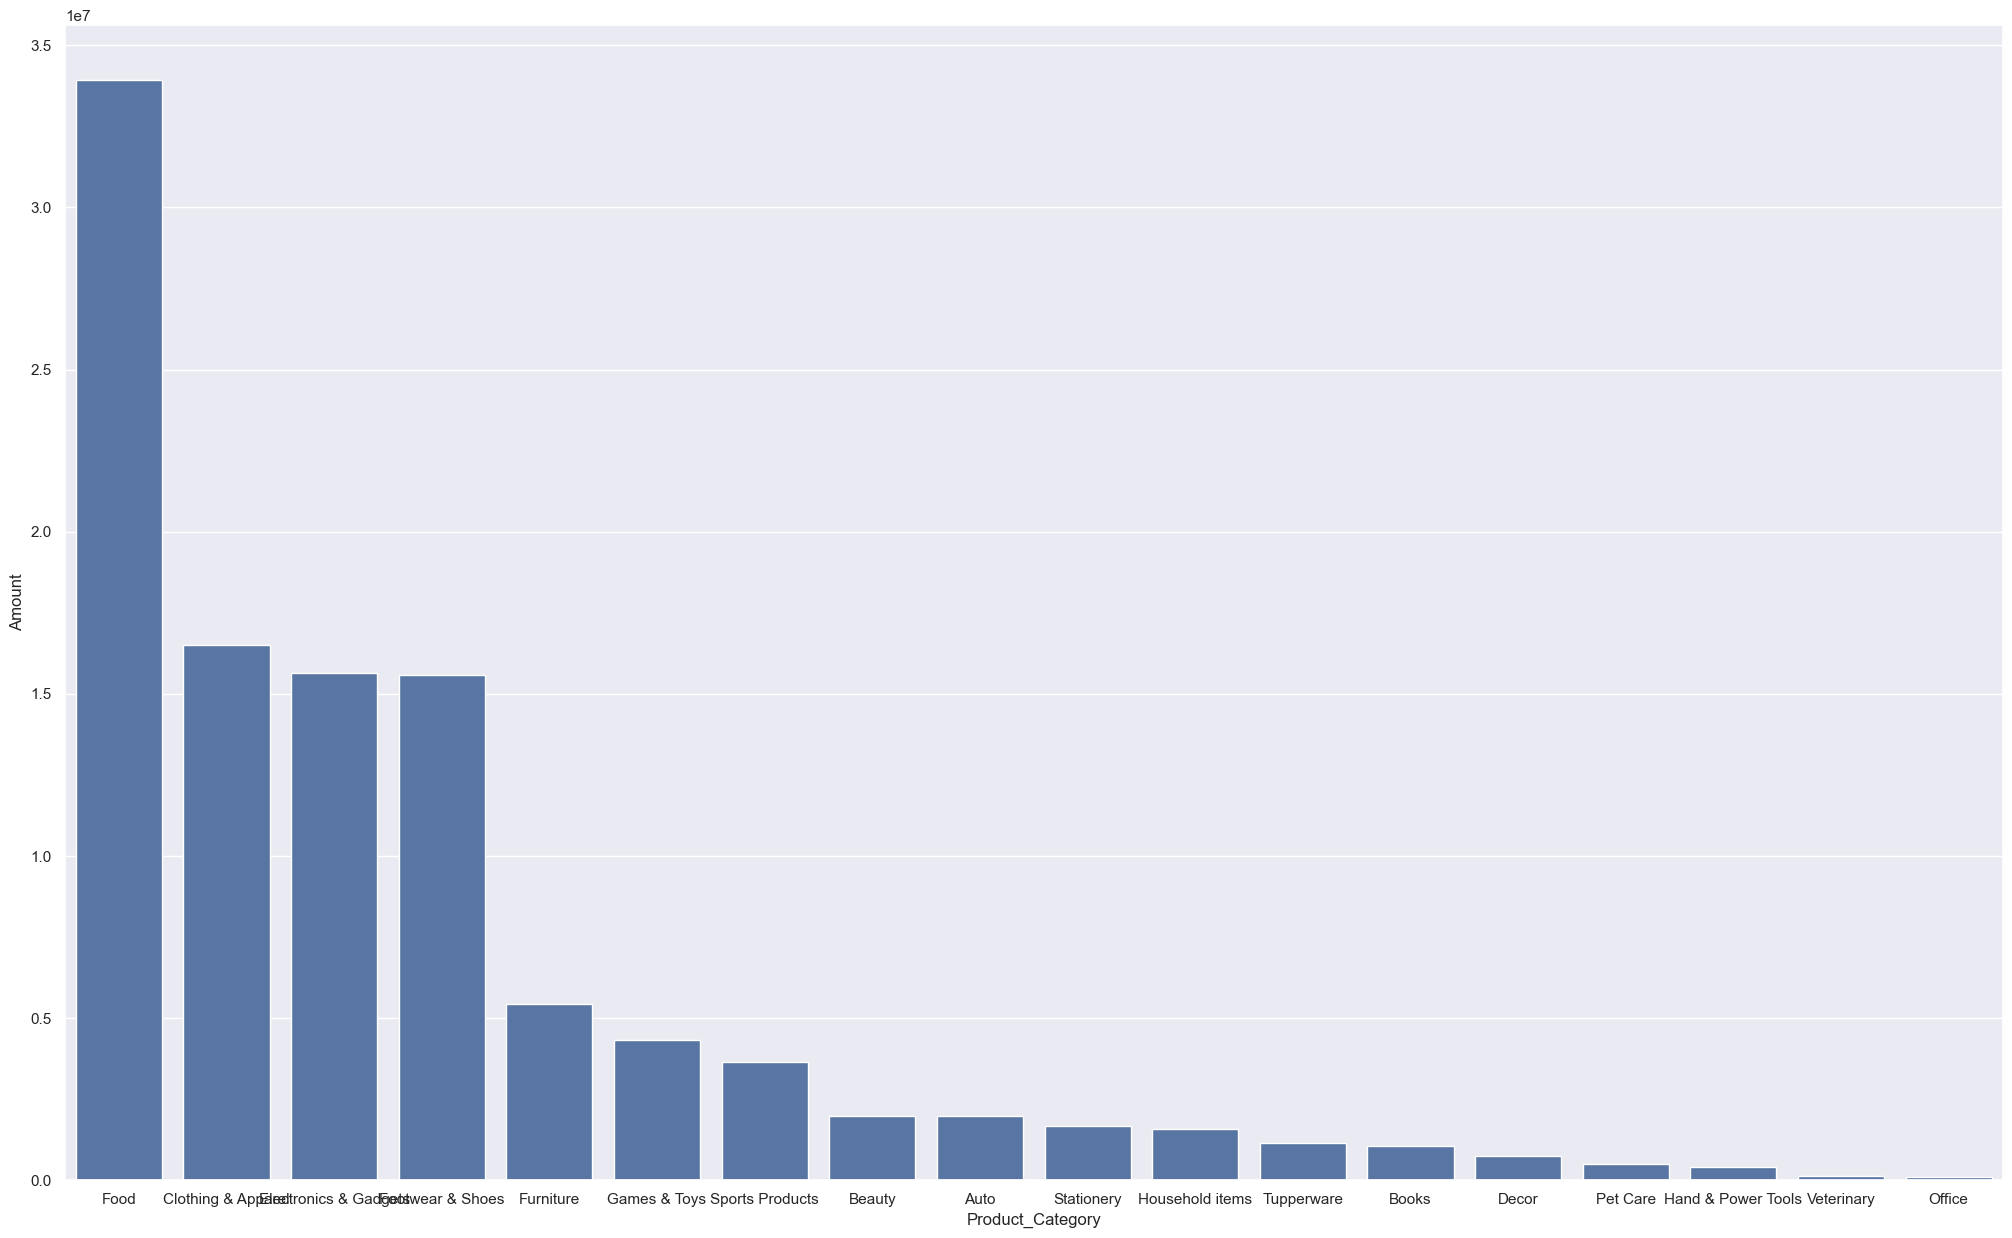

In [51]:
sales_pro=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Product_Category',y='Amount',data=sales_pro)
sns.set(rc={'figure.figsize':(45,15)})


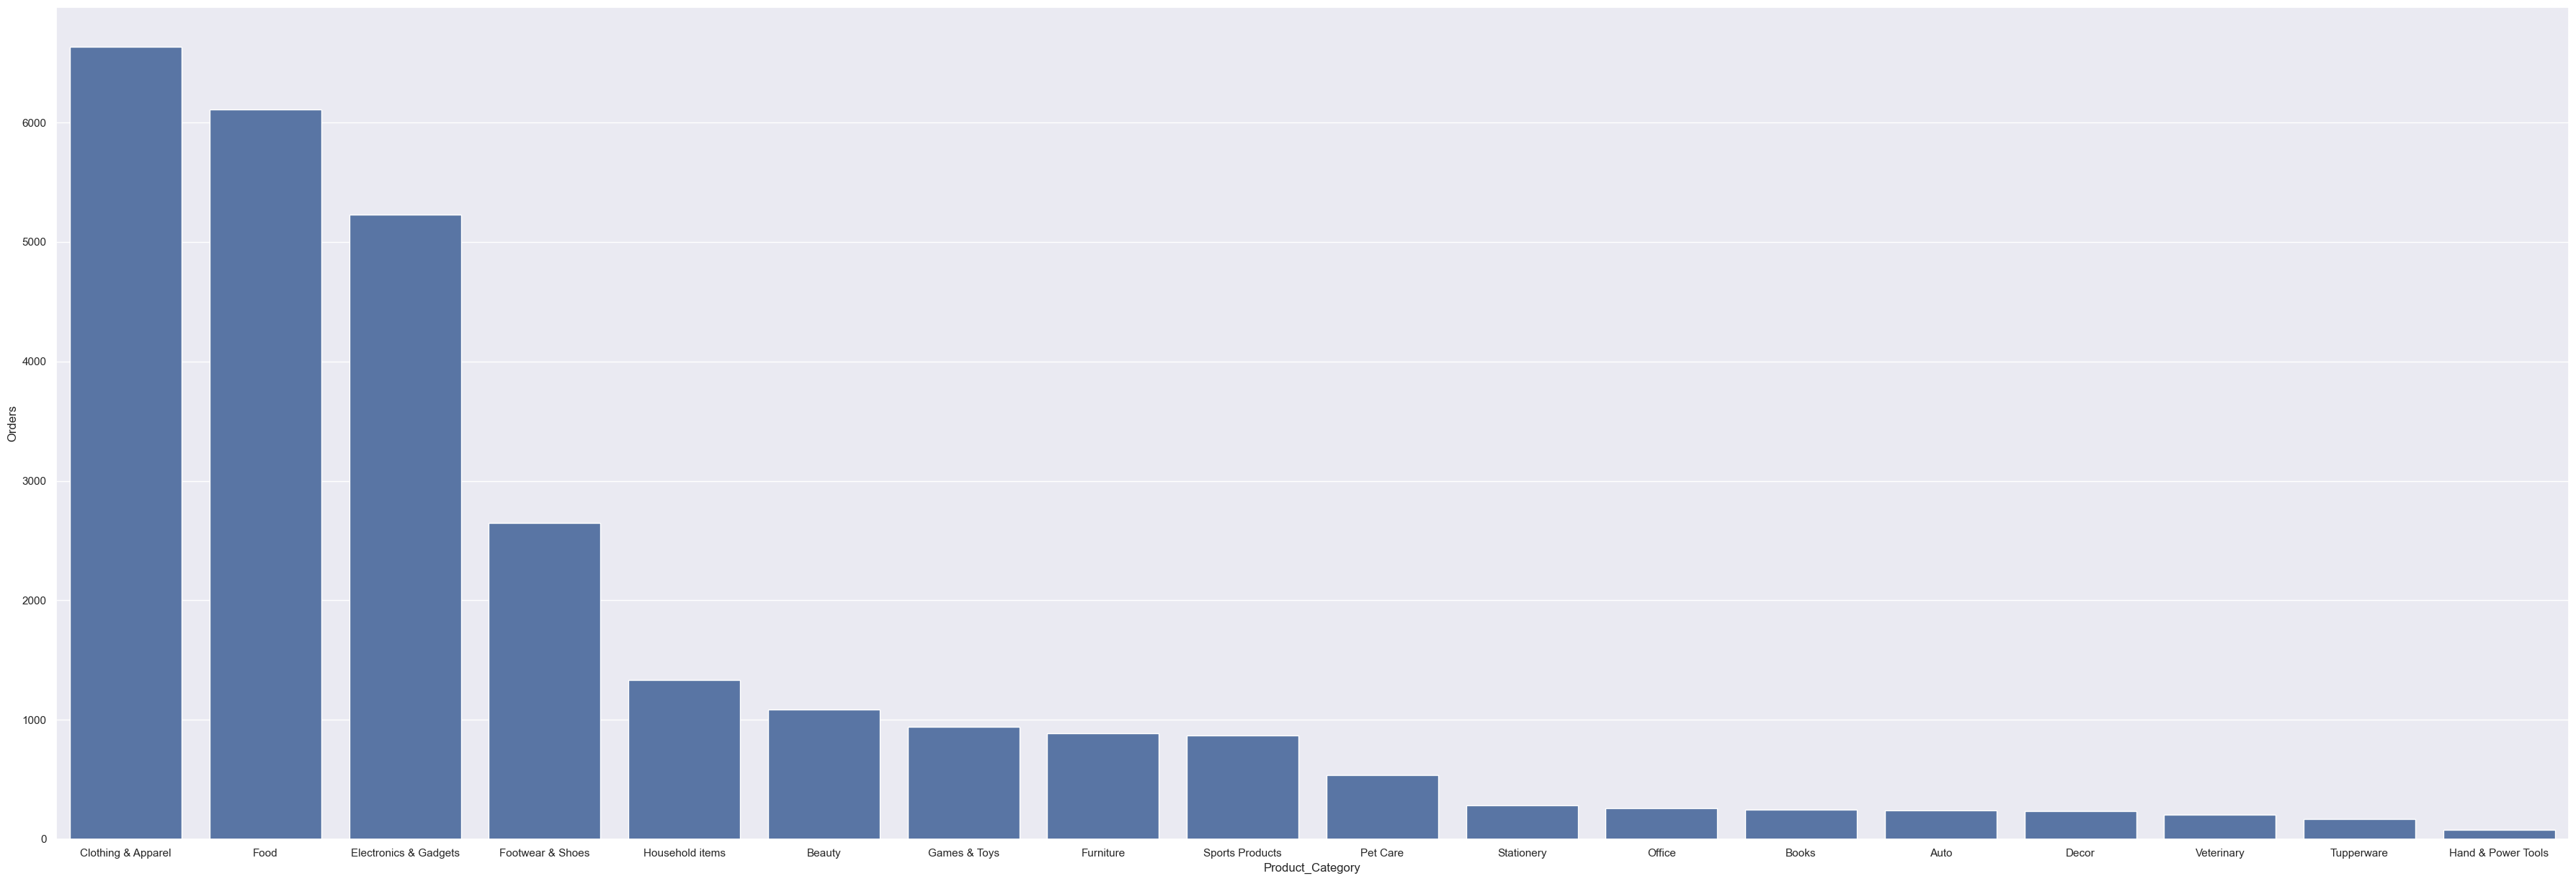

In [53]:
sales_pro=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.barplot(x='Product_Category',y='Orders',data=sales_pro)
sns.set(rc={'figure.figsize':(45,15)})
